In [141]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler


mpl.rcParams['figure.figsize'] = (15, 5)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')


In [142]:
# creating a dataframe from the csv file
df = pd.DataFrame(pd.read_csv('../output/zero4_outputs.csv'))
df = df.drop([df.columns[0]], axis='columns') 
df = df.iloc[:,:-3]
df.reset_index(drop=True, inplace=True)
  
# Change UTC Time to CST Time 
from datetime import datetime

CST_time_list = []
for time in df['Time'].to_list():
    CST_time_list.append(datetime.fromtimestamp(time))

df['Time'] = pd.DataFrame(CST_time_list)

# Date Time: Minutes Seconds
# df.index = pd.to_datetime(df['Time'], format='%d.%m.%Y %H:%M:%S')
date_time = df['Time'].dt.strftime('%M %S')

# checking our dataframe once again
df.head()

,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_49,Subcar_50,Subcar_51,Subcar_52,Subcar_53,Subcar_54,Subcar_55,Subcar_56,Subcar_57,Subcar_58
0,2022-01-08 08:35:42,5499.938181,7461.867126,6230.129694,8741.921642,297.127919,327.200244,362.527240,353.411941,351.432782,...,575.782077,520.239368,471.936436,437.649403,412.093436,393.782935,396.807258,398.600050,399.450873,405.544079
1,2022-01-08 08:35:43,5499.938181,7461.867126,6230.129694,8741.921642,350.910245,340.565706,338.013313,332.434956,327.232333,...,455.247186,423.709806,390.858030,367.766230,339.484904,339.087010,343.083080,343.739727,346.943800,351.039884
2,2022-01-08 08:35:44,5499.938181,7461.867126,6230.129694,8741.921642,357.572370,389.307077,421.911128,424.001179,447.754397,...,672.899695,599.141052,524.108767,466.309983,418.119600,397.935924,387.985824,371.260017,354.983098,338.710791
3,2022-01-08 08:35:45,5499.938181,7461.867126,6230.129694,8741.921642,507.385455,518.653063,533.348854,545.424605,542.492396,...,610.351538,538.108725,508.141712,459.243944,413.706418,406.503382,392.998728,389.802514,381.072172,390.508643
4,2022-01-08 08:35:46,5499.938181,7461.867126,6230.129694,8741.921642,379.117396,397.553770,415.226444,450.480854,445.583887,...,788.428817,729.188590,698.148981,653.314626,626.906692,633.941638,639.366092,651.254942,668.481862,671.060355


In [143]:
df.shape

(3802, 59)

In [144]:
df.describe().transpose()[['mean', 'std']]

,mean,std
Subcar_0,5482.579092,3.085411e+02
Subcar_1,7455.158795,1.145413e+02
Subcar_2,6233.369403,6.309534e+01
Subcar_3,8730.690589,1.676047e+02
Subcar_4,437.319876,4.949601e+02
Subcar_5,418.955691,2.089375e+02
Subcar_6,422.932055,2.024530e+02
Subcar_7,422.431979,1.935432e+02
Subcar_8,413.767333,1.816907e+02
Subcar_9,410.627681,1.717759e+02


<AxesSubplot:>

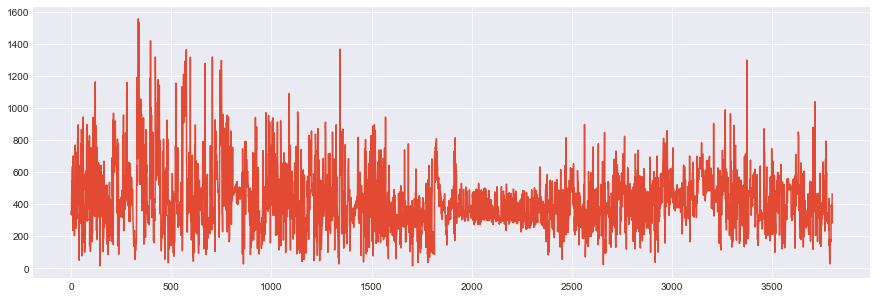

In [145]:
temp = df['Subcar_7']
temp.plot()

In [146]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + 5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [147]:
WINDOW_SIZE = 144
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((3658, 5, 1), (3658,))

In [148]:
x_train, y_train = X[:2000], y[:2000]
x_test, y_test = X[700:750], y[700:750]
x_val, y_val = X[750:], y[750:]
print('x_train set:', x_train.shape)
print('y_train set:', y_train.shape)
print('x_test set:', x_test.shape)
print('y_test:', y_test.shape)
print('x_val set:', x_val.shape)
print('y_val set:', y_val.shape)

x_train set: (2000, 5, 1)
y_train set: (2000,)
x_test set: (50, 5, 1)
y_test: (50,)
x_val set: (2908, 5, 1)
y_val set: (2908,)


In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

In [150]:
model4 = Sequential()
model4.add(InputLayer((5, 1)))
model4.add(Conv1D(64, kernel_size=2))
model4.add(Conv1D(32, kernel_size=2))
model4.add(Flatten())
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 4, 64)             192       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 3, 32)             4128      
_________________________________________________________________
flatten_8 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 776       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 5,105
Trainable params: 5,105
Non-trainable params: 0
_________________________________________________________________


In [151]:
cp = ModelCheckpoint('../save/model4/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[MeanAbsoluteError()])

In [152]:
model4.fit(x_train,y_train, validation_data=(x_val, y_val),  epochs=10, callbacks=[early_stopping,cp])

Epoch 1/10
63/63 [==============================] - 1s 10ms/step - loss: 58458.7188 - mean_absolute_error: 177.2281 - val_loss: 24642.2070 - val_mean_absolute_error: 113.1887
Epoch 2/10
63/63 [==============================] - 1s 9ms/step - loss: 41024.6094 - mean_absolute_error: 145.5917 - val_loss: 23555.0684 - val_mean_absolute_error: 108.8853
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 40344.6914 - mean_absolute_error: 143.7243 - val_loss: 23685.4727 - val_mean_absolute_error: 108.7706
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 40026.0469 - mean_absolute_error: 142.7878 - val_loss: 24231.6699 - val_mean_absolute_error: 111.4755


In [153]:
from tensorflow.keras.models import load_model
model1 = load_model('../save/model4/')

In [154]:
test_predictions1 = model1.predict(x_test).flatten()
test_results1 = pd.DataFrame(data={'Test predictions': test_predictions1, 'Actuals': y_test})
test_results1

,Test predictions,Actuals
0,478.078125,1318.891959
1,862.581604,427.907700
2,586.094421,308.974109
3,518.212036,375.431752
4,469.803589,315.995253
5,442.781921,323.487249
6,332.677063,281.128085
7,290.451965,346.161812
8,322.767151,294.266886
9,293.133179,291.756748


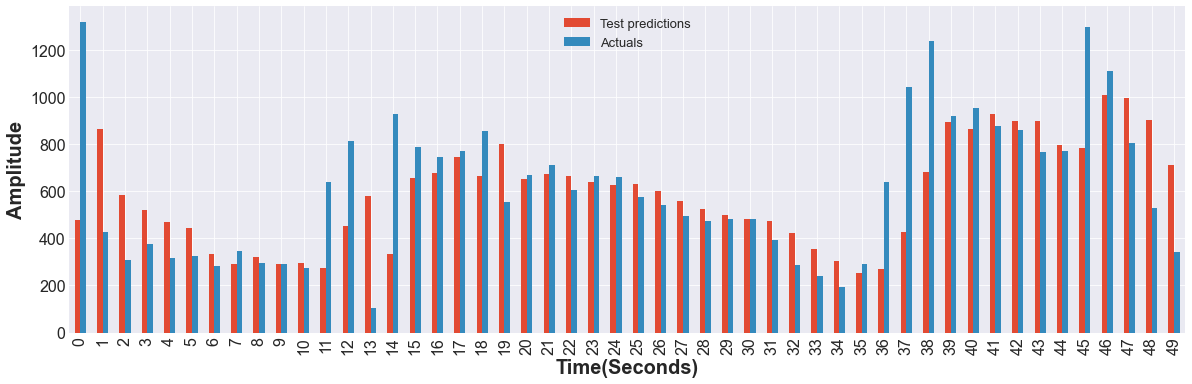

In [155]:
fig,ax = plt.subplots(figsize=(20,6))
test_results1.plot(kind='bar',ax=ax)
ax.set_xlabel("Time(Seconds)", fontsize=20, fontweight='bold')
ax.set_ylabel("Amplitude",fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()

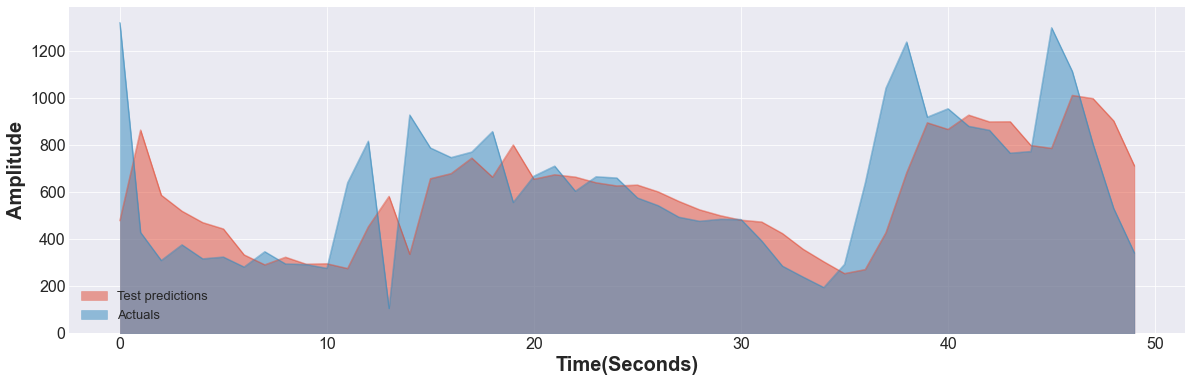

In [156]:
fig,ax = plt.subplots(figsize=(20,6))
test_results1.plot(kind='area',ax=ax,stacked=False)
ax.set_xlabel("Time(Seconds)", fontsize=20, fontweight='bold')
ax.set_ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()

No handles with labels found to put in legend.


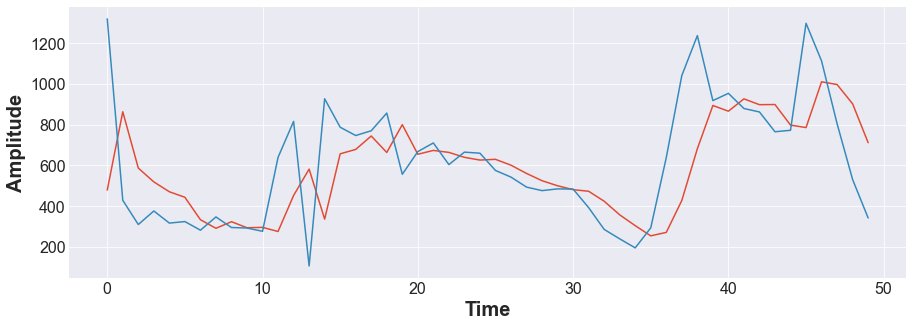

In [157]:
plt.plot(test_results1['Test predictions'])
plt.plot(test_results1['Actuals'])
plt.xlabel("Time", fontsize=20, fontweight='bold')
plt.ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)


In [158]:
model5 = Sequential()
model5.add(InputLayer((5, 1)))
model5.add(Conv1D(64, kernel_size=2,))
model5.add(Conv1D(32, kernel_size=2, ))
model5.add(Flatten())
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 4, 64)             192       
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 3, 32)             4128      
_________________________________________________________________
flatten_9 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 776       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 5,105
Trainable params: 5,105
Non-trainable params: 0
_________________________________________________________________


In [159]:
cp3 = ModelCheckpoint('../save/model5/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)
model5.compile( optimizer=Adam(learning_rate=0.0001), 
                loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [160]:
model5.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[early_stopping, cp3])

Epoch 1/10
63/63 [==============================] - 1s 10ms/step - loss: 248367.3750 - mean_absolute_error: 440.5659 - val_loss: 181655.9531 - val_mean_absolute_error: 394.2293
Epoch 2/10
63/63 [==============================] - 1s 9ms/step - loss: 154834.2344 - mean_absolute_error: 328.8401 - val_loss: 50721.6016 - val_mean_absolute_error: 183.8422
Epoch 3/10
63/63 [==============================] - 1s 9ms/step - loss: 52948.4219 - mean_absolute_error: 169.5857 - val_loss: 26566.1836 - val_mean_absolute_error: 117.9749
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 45094.7266 - mean_absolute_error: 153.5748 - val_loss: 25890.5273 - val_mean_absolute_error: 116.0721
Epoch 5/10
63/63 [==============================] - 1s 9ms/step - loss: 44349.0352 - mean_absolute_error: 152.2103 - val_loss: 25508.3906 - val_mean_absolute_error: 115.0542
Epoch 6/10
63/63 [==============================] - 1s 10ms/step - loss: 43703.5039 - mean_absolute_error: 150.9675 - val_los

In [161]:
from tensorflow.keras.models import load_model
model5 = load_model('../save/model5/')

In [162]:
test_predictions2 = model5.predict(x_test).flatten()
test_results2 = pd.DataFrame(data={'Test predictions': test_predictions2, 'Actuals': y_test})
test_results2

,Test predictions,Actuals
0,434.000336,1318.891959
1,691.566650,427.907700
2,669.781372,308.974109
3,560.273987,375.431752
4,501.689667,315.995253
5,430.023376,323.487249
6,325.333801,281.128085
7,302.320374,346.161812
8,308.935730,294.266886
9,299.832031,291.756748


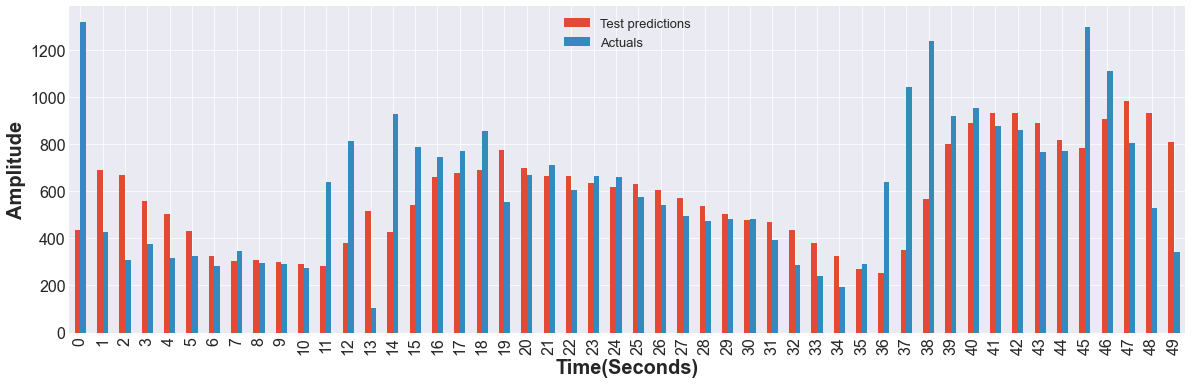

In [163]:
fig,ax = plt.subplots(figsize=(20,6))
test_results2.plot(kind='bar',ax=ax)
ax.set_xlabel("Time(Seconds)", fontsize=20, fontweight='bold')
ax.set_ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()

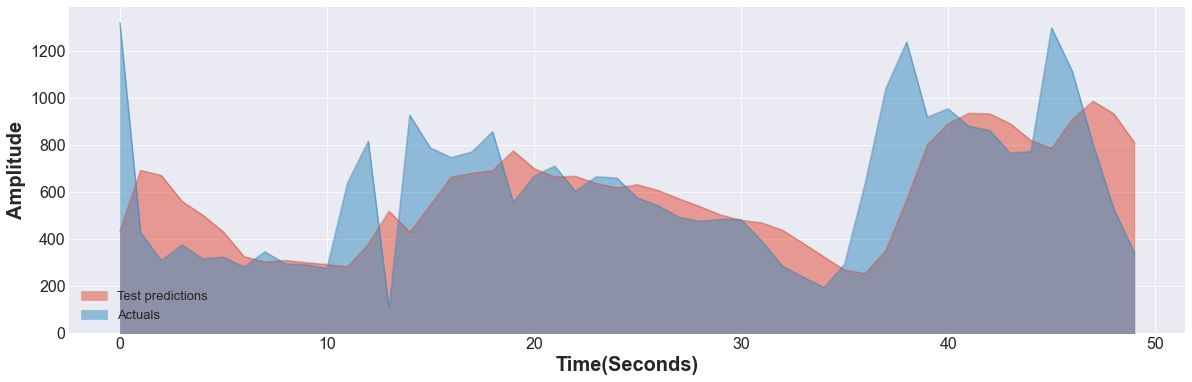

In [164]:
fig,ax = plt.subplots(figsize=(20,6))
test_results2.plot(kind='area',ax=ax,stacked=False)
ax.set_xlabel("Time(Seconds)", fontsize=20, fontweight='bold')
ax.set_ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()

No handles with labels found to put in legend.


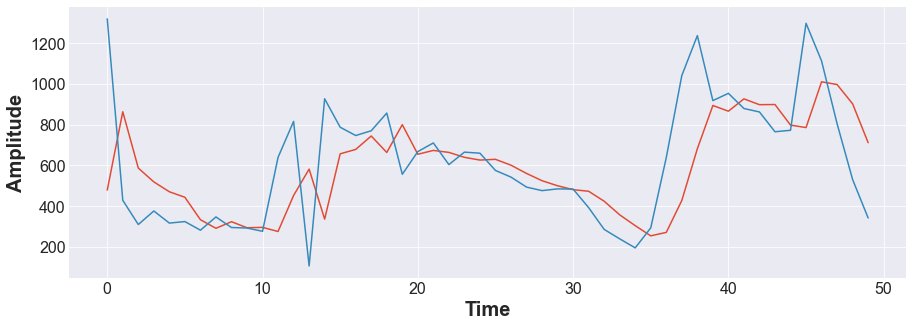

In [165]:
plt.plot(test_results1['Test predictions'])
plt.plot(test_results1['Actuals'])
plt.xlabel("Time", fontsize=20, fontweight='bold')
plt.ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)


In [166]:
X = df.iloc[:, [7,10] ]
y = df.iloc[:, 9]

In [167]:
X.head()

,Subcar_6,Subcar_9
0,362.527240,353.793725
1,338.013313,319.820262
2,421.911128,441.279957
3,533.348854,562.694411
4,415.226444,458.423385


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [169]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,random_state=100)

In [170]:
x_train1.head()

,Subcar_6,Subcar_9
2518,389.867926,363.323547
3093,483.467683,464.009698
3005,613.481866,605.324706
115,785.800229,753.050463
529,345.833775,330.024242


In [171]:
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train1)

In [172]:
x_test1 = scaler.transform(x_test1)

In [173]:
scaler.mean_

array([424.24966958, 411.9004845 ])

In [174]:
# variance
scaler.scale_

array([202.35292646, 171.66761073])

In [175]:
x_train_scaled = scaler.transform(x_train1)

C:\Users\Owner\anaconda3\envs\Tensorflow210\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [176]:
# mean of standardize data
x_train_scaled.mean(axis=0)

array([-2.09658282, -2.3994071 ])

In [177]:
# scaled variance/ std
x_train_scaled.std(axis=0)

array([0.00494186, 0.00582521])